In [12]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.signal import argrelextrema
import numpy as np
from scipy.stats import linregress



In [13]:
col_names=['x1','x2','x3','y1','y2','y3']
df = pd.read_csv('corr.csv', 
                 sep=",", 
                 skiprows=1,
#                  usecols=[:],
                 names=col_names)

## Pearson and Spearman correlation - Question 1

In [36]:
pearson = df.corr(method='pearson')
print(pearson)
spearman = df.corr(method='spearman')
print(spearman)

          x1        x2        x3        y1        y2        y3
x1  1.000000  1.000000  0.032733  0.580098  0.339721  0.339721
x2  1.000000  1.000000  0.032733  0.580098  0.339721  0.339721
x3  0.032733  0.032733  1.000000 -0.197447 -0.901029 -0.901029
y1  0.580098  0.580098 -0.197447  1.000000  0.573215  0.573215
y2  0.339721  0.339721 -0.901029  0.573215  1.000000  1.000000
y3  0.339721  0.339721 -0.901029  0.573215  1.000000  1.000000
          x1        x2        x3        y1        y2        y3
x1  1.000000  1.000000  0.875047  0.572420  0.572420  0.572420
x2  1.000000  1.000000  0.875047  0.572420  0.572420  0.572420
x3  0.875047  0.875047  1.000000  0.431895  0.431895  0.431895
y1  0.572420  0.572420  0.431895  1.000000  1.000000  1.000000
y2  0.572420  0.572420  0.431895  1.000000  1.000000  1.000000
y3  0.572420  0.572420  0.431895  1.000000  1.000000  1.000000


## x1 and y1

Text(0,0.5,'y1')

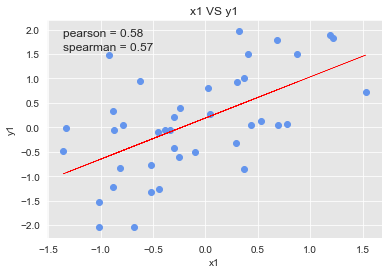

In [51]:
fig1 = plt.figure()
x = df['x1']
y=df['y1']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y1 = '+str(round(m,2)) + ' *' + ' x1 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[0,3],2))
sc='spearman = '+ str(round(spearman.iloc[0,3],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.scatter(x, y,color='cornflowerblue',marker='o')
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),max(y)-0.1), fontsize=12) 
plt.annotate(sc, xy=(min(x),max(y)-0.4), fontsize=12) 
plt.title('x1 VS y1')
plt.xlabel('x1')
plt.ylabel('y1')


## x2 and y2

Text(0,0.5,'y2')

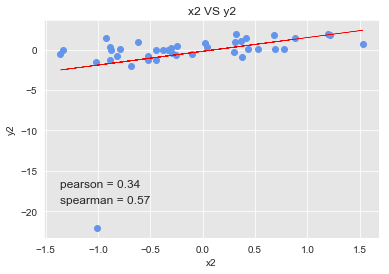

In [48]:
x = df['x2']
y=df['y2']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y2 = '+str(round(m,2)) + ' *' + ' x2 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[1,4],2))
sc='spearman = '+ str(round(spearman.iloc[1,4],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.scatter(x, y,color='cornflowerblue',marker='o')
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
plt.title('x2 VS y2')
plt.xlabel('x2')
plt.ylabel('y2')


## x3 and y3

Text(0,0.5,'y3')

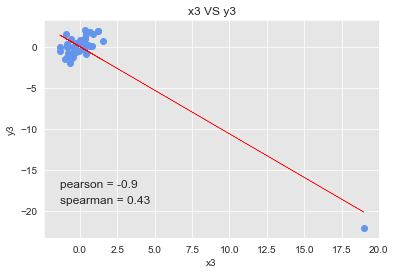

In [50]:
x = df['x3']
y=df['y3']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y3 = '+str(round(m,2)) + ' *' + ' x3 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[2,5],2))
sc='spearman = '+ str(round(spearman.iloc[2,5],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.scatter(x, y,color='cornflowerblue',marker='o')
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
plt.title('x3 VS y3')
plt.xlabel('x3')
plt.ylabel('y3')


## Question 2

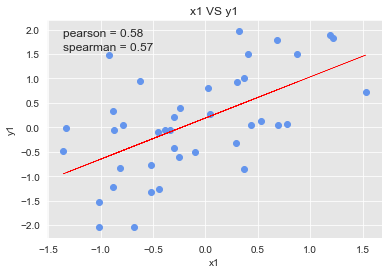

In [52]:
fig1